In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model, load_model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/MyDrive/dataKLTN/chest_xray/train'
valid_path = '/content/drive/MyDrive/dataKLTN/chest_xray/test'

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/dataKLTN/chest_xray/train/*')

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)
 
# creating a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
 
test_datagen = ImageDataGenerator(rescale = 1./255)
 
# providing the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataKLTN/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
 

 
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataKLTN/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 7712 images belonging to 2 classes.
Found 784 images belonging to 2 classes.


In [ ]:
# fiting the model
 
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
241/241 [==============================] - 4592s 19s/step - loss: 0.1943 - accuracy: 0.9232 - val_loss: 0.2781 - val_accuracy: 0.9043
Epoch 2/5
241/241 [==============================] - 4519s 19s/step - loss: 0.1132 - accuracy: 0.9575 - val_loss: 0.3364 - val_accuracy: 0.8929
Epoch 3/5
241/241 [==============================] - 4517s 19s/step - loss: 0.0851 - accuracy: 0.9671 - val_loss: 0.3751 - val_accuracy: 0.8967
Epoch 4/5
241/241 [==============================] - 4505s 19s/step - loss: 0.1002 - accuracy: 0.9628 - val_loss: 1.1278 - val_accuracy: 0.7296
Epoch 5/5
241/241 [==============================] - 4522s 19s/step - loss: 0.0835 - accuracy: 0.9668 - val_loss: 0.6852 - val_accuracy: 0.8240


In [ ]:
import tensorflow as tf
from keras.models import load_model
model.save('vgg16pneumonianewdata.h5')


In [ ]:
import sys
import os
import argparse

import random

import time
import datetime 

from collections import Counter

import numpy as np
import pandas as pd

import shutil
from tqdm import tqdm

import inspect
import gc

import re

from PIL import Image
import cv2

import keras

from keras.utils import np_utils

from keras.preprocessing.image import ImageDataGenerator

from keras import models
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, GlobalAveragePooling1D, GlobalAveragePooling2D, Flatten, BatchNormalization, Dense, AveragePooling2D


from keras.applications.inception_v3 import InceptionV3


from keras.constraints import maxnorm


from keras import optimizers
from keras.optimizers import Adam


from keras import backend as K
K.image_data_format()

from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau

from keras.wrappers.scikit_learn import KerasClassifier


from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix, classification_report


from mlxtend.plotting import plot_confusion_matrix

import tensorflow as tf



from IPython.display import display

import seaborn as sns

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [ ]:
def dir_file_count(directory):
  return sum([len(files) for r, d, files in os.walk(directory)])

In [ ]:
def create_directory(directory_path, remove=False):
    if remove and os.path.exists(directory_path):
        try:
            shutil.rmtree(directory_path)
            os.mkdir(directory_path)
        except:
            print("Could not remove directory : ", directory_path)
            return False
    else:
        try:
            os.mkdir(directory_path)
        except:
            print("Could not create directory: ", directory_path)
            return False
        
    return True

In [ ]:
# Removes everything except alphabetical and selected characters from name string
def name_correct(name):
    return re.sub(r'[^a-zA-Z,:]', ' ', name).title()

In [ ]:
#rescale = 1./255

#target_size = (, 150)
batch_size = 64 
class_mode = "categorical"

In [ ]:
testing_dir = "/content/drive/MyDrive/dataKLTN/chest_xray/test"

In [ ]:
test_generator = test_datagen.flow_from_directory(
    testing_dir,
    target_size = (224, 224),
    class_mode=class_mode,
    batch_size=196,
    shuffle = False)

Found 784 images belonging to 2 classes.


In [ ]:
from keras import models    
model = models.load_model('/content/drive/MyDrive/vgg16pneumonianewdata.h5')

In [ ]:
y_pred = model.predict_generator(test_generator, steps=4, verbose=1)
#y_pred = model.predict_generator(test_generator, verbose=1)
y_pred = y_pred.argmax(axis=-1)


<ipython-input-13-93d65a69478f>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_generator, steps=4, verbose=1)


4/4 [==============================] - 288s 70s/step


In [ ]:
y_true=test_generator.classes
classes = os.listdir(train_path)
classes = [name_correct(i) for i in classes]


In [ ]:

#input_directory = r"data/input/"
output_directory = r"/content/drive/MyDrive/output"




figure_directory = r"/content/drive/MyDrive/output/figures"

figure_directory = r"/content/drive/MyDrive/output/figures"
if not os.path.exists(figure_directory):
    os.mkdir(figure_directory)
    
    
file_name_pred_batch = figure_directory+r"/result"
file_name_pred_sample = figure_directory+r"/sample"
main_model_dir = output_directory + r"models/"
main_log_dir = output_directory + r"logs/"





model_dir = main_model_dir + time.strftime('%Y-%m-%d %H-%M-%S') + "/"
log_dir = main_log_dir + time.strftime('%Y-%m-%d %H-%M-%S')

create_directory(model_dir, remove=True)
create_directory(log_dir, remove=True)

model_file = model_dir + "{epoch:02d}-val_accuracy-{val_accuracy:.2f}-val_loss-{val_loss:.2f}.hdf5"

Could not create directory:  /content/drive/MyDrive/outputmodels/2022-12-28 05-27-48/
Could not create directory:  /content/drive/MyDrive/outputlogs/2022-12-28 05-27-48


------------------------------------------------------------------------------------------
Derived Report
------------------------------------------------------------------------------------------
Precision     : 74.23%
Recall        : 98.97%
F1-Score      : 84.84%
------------------------------------------------------------------------------------------





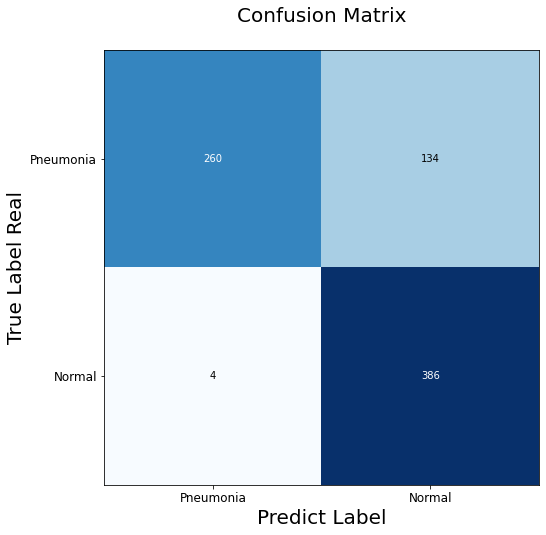

Accuracy: 82.40%
Sensitivity: 65.99%
Specificity: 98.97%



------------------------------------------------------------------------------------------
Report for Model File:  MyDrive/outputmodels/2022-12-28 05-27-48/{epoch:02d}-val_accuracy-{val_accuracy:.2f}-val_loss-{val_loss:.2f}.hdf5
------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

   Pneumonia       0.98      0.66      0.79       394
      Normal       0.74      0.99      0.85       390

    accuracy                           0.82       784
   macro avg       0.86      0.82      0.82       784
weighted avg       0.86      0.82      0.82       784

------------------------------------------------------------------------------------------


In [ ]:
image_file_name_CM = figure_directory+"/VGG16"

title = model_file.split("/")
model_title = "/".join([i for i in title[3:]])

precision = precision_score(y_true, y_pred) 
recall = recall_score(y_true, y_pred) 
f1 = f1_score(y_true, y_pred) 

print("-"*90)
print("Derived Report")
print("-"*90)
print("%s%.2f%s"% ("Precision     : ", precision*100, "%"))
print("%s%.2f%s"% ("Recall        : ", recall*100,    "%"))
print("%s%.2f%s"% ("F1-Score      : ", f1*100,        "%"))
print("-"*90)
print("\n\n")

CM = confusion_matrix(y_true, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(10,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(len(classes)), classes, fontsize=12)
plt.yticks(range(len(classes)), classes, fontsize=12)
plt.title("Confusion Matrix", fontsize=20)
plt.ylabel('True Label Real',fontsize=20)
plt.xlabel('Predict Label',fontsize=20)
fig.savefig(image_file_name_CM, dpi=100)
fig.savefig(figure_directory+"/CM.pdf", bbox_inches='tight')
plt.show()
    

cls_report_print = classification_report(y_true, y_pred, target_names=classes)

cls_report = classification_report(y_true, y_pred, target_names=classes, output_dict=True)


total1=sum(sum(CM))

##### From confusion matrix calculate accuracy
print("======================================")
accuracy1=(CM[0,0]+CM[1,1])/total1
print("%s%.2f%s"% ("Accuracy: ", accuracy1*100, "%"))

sensitivity1 = CM[0,0]/(CM[0,0]+CM[0,1])
print("%s%.2f%s"% ("Sensitivity: ", sensitivity1*100, "%"))

specificity1 = CM[1,1]/(CM[1,0]+CM[1,1])
print("%s%.2f%s"% ("Specificity: ", specificity1*100, "%"))


print("\n\n")
print("-"*90)
print("Report for Model File: ", model_title)
print("-"*90)
print(cls_report_print)
print("-"*90)

ROC_AUC

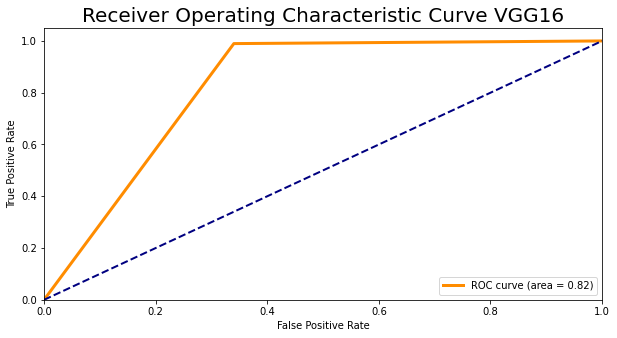

In [ ]:
import sklearn.metrics as metrics

image_file_name_ROC = figure_directory+"/ROC_VGG16"

fpr, tpr, threshold = roc_curve(y_true, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# Creating roc Object to R analysis
rocObj=[y_true, y_pred]
np.savetxt("/content/drive/MyDrive/output/AUC_VGG16.csv", np.transpose(rocObj), header="y_true,y_pred", delimiter=",",fmt='%f', comments='')

roc_plot = plt.figure(figsize=(10, 5))

plt.title('Receiver Operating Characteristic Curve VGG16',fontsize=20)
plt.plot(fpr, tpr, color='darkorange',
           lw=3, label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
roc_plot.savefig(image_file_name_ROC, dpi=100)
roc_plot.savefig(figure_directory+"/ROC_curve_VGG16.pdf", bbox_inches='tight')